In [1]:
import pickle
import pandas as pd

In [3]:
with open(r"full_path\Extended_manhattan_pooling.obj", "rb") as file:
    data = pickle.load(file)

In [15]:
data[0].keys()

dict_keys(['requests', 'schedule', 'results', 'settings'])

In [18]:
data[0]["requests"].columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration', 'origin',
       'destination', 'status', 'dist', 'treq', 'ttrav', 'pax_id', 'VoT',
       'delta', 'u', 'u_PT', 'ride_id', 'ttrav_sh', 'u_sh', 'kind', 'position',
       'x_org', 'y_org', 'x_dest', 'y_dest'],
      dtype='object')

In [20]:
data[0]["requests"][:1]

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,u_PT,ride_id,ttrav_sh,u_sh,kind,position,x_org,y_org,x_dest,y_dest
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,999999,306,2591,29.772825,21,0,-73.981942,40.719462,-73.938959,40.828984


In [21]:
for d in data:
    d["requests"]["ttrav_add"] = (d["requests"]["ttrav_sh"] - d["requests"]["ttrav"])/d["requests"]["ttrav"]

In [23]:
data[0]["requests"][:1]

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,ride_id,ttrav_sh,u_sh,kind,position,x_org,y_org,x_dest,y_dest,ttrav_add
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,306,2591,29.772825,21,0,-73.981942,40.719462,-73.938959,40.828984,0.0841


In [28]:
len(data)

34592

In [26]:
data[0]["settings"]

{'Replication': 0,
 'Batch': 0,
 'shared_discount': 0.2,
 'Start_time': Timestamp('2016-01-01 00:00:17'),
 'End_time': Timestamp('2016-01-01 00:29:45'),
 'Demand_size': 198}

In [27]:
data_one_discount = [d for d in data if d["settings"]["shared_discount"] == 0.32]

In [29]:
len(data_one_discount)

8686

In [30]:
df = pd.DataFrame()
for d in data_one_discount:
    df = pd.concat([df, d['requests']], ignore_index=True)

In [31]:
len(df)

1227731

In [32]:
df[:2]

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,ride_id,ttrav_sh,u_sh,kind,position,x_org,y_org,x_dest,y_dest,ttrav_add
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,2057,2848,28.779575,50,0,-73.981942,40.719462,-73.938959,40.828984,0.191632
1,id1210365,2016-01-01 00:01:01,2016-01-01 00:07:49,408,42432756,42434113,0,2640,44,440,...,1,440,5.500000,1,0,-73.965196,40.801107,-73.947489,40.815207,0.000000


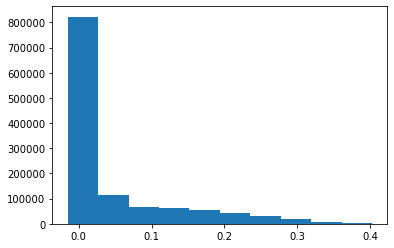

In [34]:
import matplotlib.pyplot as plt

plt.hist(df["ttrav_add"])
plt.show()
plt.close()

In [37]:
len(df.loc[df["ttrav_add"] == 0])

741972